<a href="https://colab.research.google.com/github/AmitK0105/AmitK0105/blob/main/TimeSeries2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
stock_data= yf.download("AAPL", start="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500
2023-01-04,124.744133,127.014724,123.480503,125.267354,89113600
2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700
2023-01-06,127.962440,128.623871,123.292931,124.398611,87754700
2023-01-09,128.485672,131.703994,128.229002,128.801587,70790800


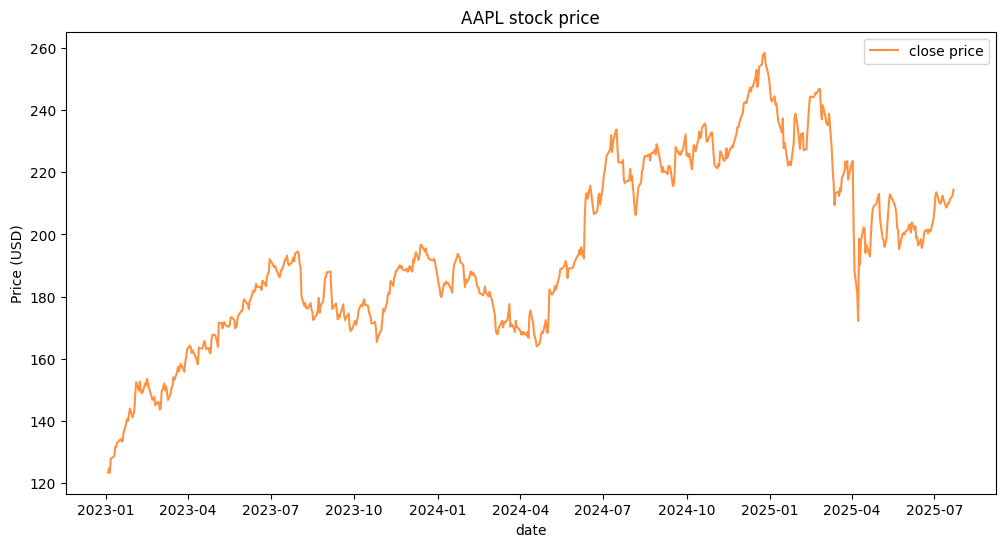

In [5]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["Close"], label= "close price", color="#FF9140" )
plt.title("AAPL stock price")
plt.xlabel("date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [ ]:
#Clasical Time Series Data De-Composition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_data= seasonal_decompose(stock_data["Close"], model="additive", period=30)

In [7]:
trend_additive= decompose_data.trend
seasonal_additive= decompose_data.seasonal
residual_additive= decompose_data.resid

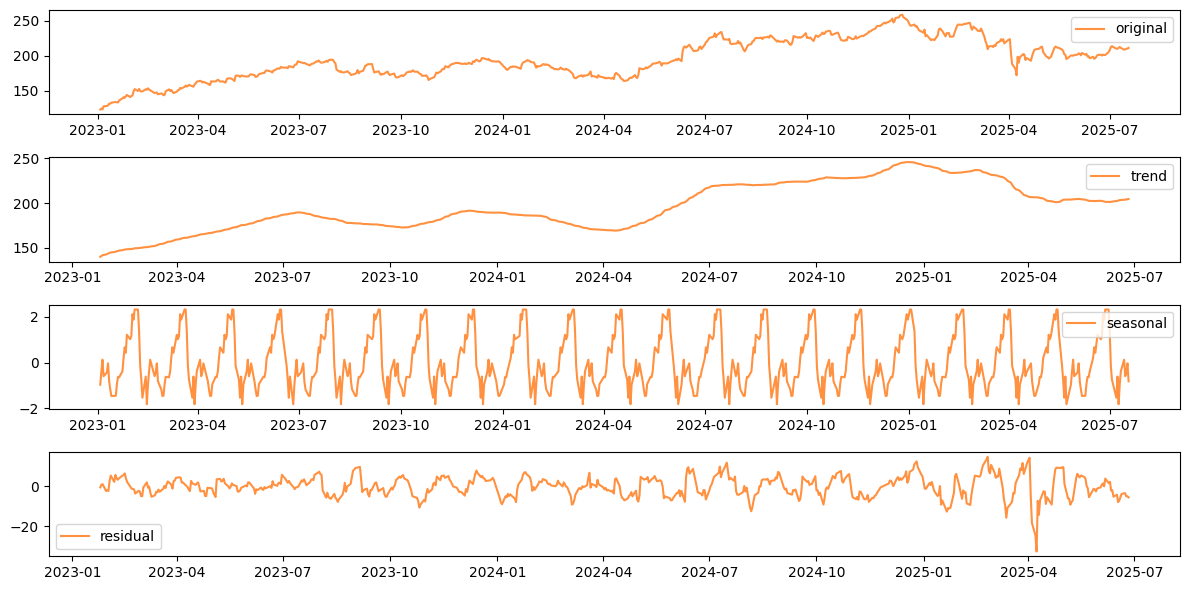

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(stock_data.index, stock_data["Close"],label= "original", color="#FF9140")
plt.legend()
plt.subplot(412)
plt.plot(trend_additive, label="trend", color= "#FF9140")
plt.legend()
plt.subplot(413)
plt.plot(seasonal_additive, label= "seasonal", color="#FF9140")
plt.legend()
plt.subplot(414)
plt.plot(residual_additive, label= "residual", color= "#FF9140")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#STL Decomposition(Seasonal & Trend Decomposition using LOESS method)-LOESS-Locally estimated scatterplot smoothning--Handle outlier in time series data

In [9]:
from statsmodels.tsa.seasonal import STL
stl= STL(stock_data["Close"], period=30)
stl_data= stl.fit()

In [ ]:
#Plot the STL decomposition

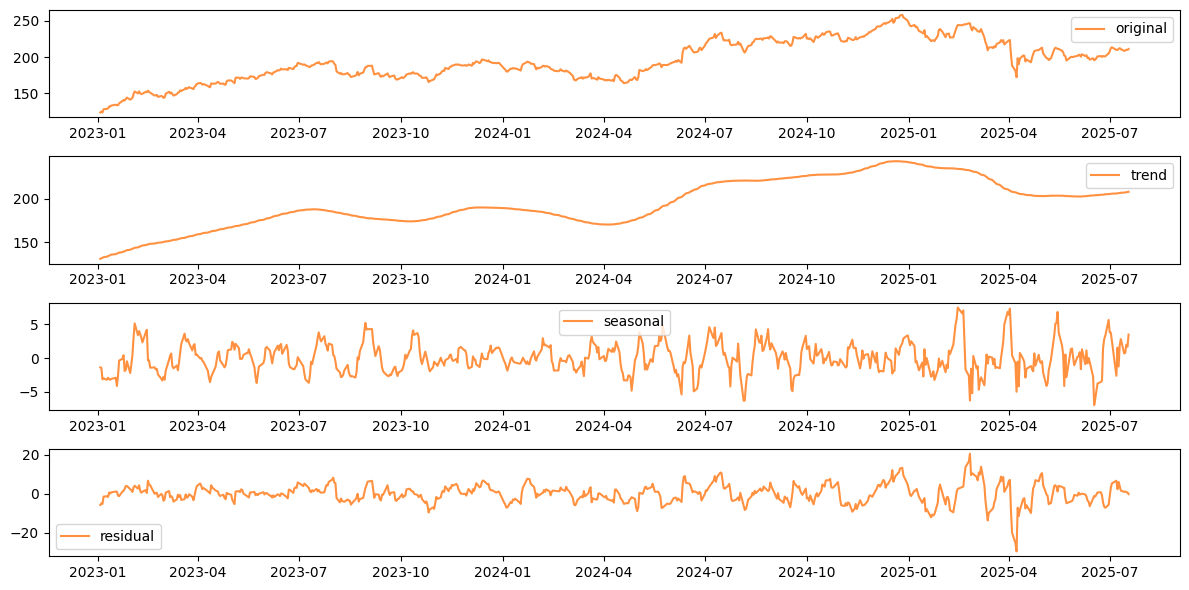

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(stl_data.observed, label="original", color="#FF9140")
plt.legend()
plt.subplot(412)
plt.plot(stl_data.trend, label="trend", color="#FF9140")
plt.legend()
plt.subplot(413)
plt.plot(stl_data.seasonal, label= "seasonal", color="#FF9140")
plt.legend()
plt.subplot(414)
plt.plot(stl_data.resid, label= "residual", color= "#FF9140")
plt.legend()
plt.tight_layout()
plt.show()
